<a href="https://colab.research.google.com/github/Zeeshan506/developerhub-task-2-pridictive-model-training/blob/main/Task_2_Predict_Future_Stock_Prices_%7C_DeveloperHub_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Predict Future Stock Prices**

## Installing and importing libraries

In [4]:
# installing yfinance
!pip install yfinance


In [5]:
# once installed import respectice libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import yfinance as yf

%matplotlib inline

## Downloading data from yfinance for APPLE

In [6]:
ticker = 'AAPL' #stands for apple
df = yf.download(ticker, period='1y', multi_level_index=False) # period returns data from today backwards

/tmp/ipython-input-6-2115642414.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='1y', multi_level_index=False) # period returns data from today backwards
[*********************100%***********************]  1 of 1 completed


## Preprocessing The Dataset

In [7]:
df.head() # first five rows

,Close,High,Low,Open,Volume
Date,,,,,
2024-07-26,216.945419,218.468296,215.004484,217.681965,41601300
2024-07-29,217.224121,218.279184,214.745706,215.950081,36311800
2024-07-30,217.781525,219.304402,215.113992,218.169709,41643800
2024-07-31,221.046219,222.778125,219.602972,220.409199,50036300
2024-08-01,217.343552,223.435059,216.009793,223.325570,62501000


In [8]:
df.describe() # statistical info of dataset

,Close,High,Low,Open,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,221.700288,223.906847,219.100578,221.332790,5.308059e+07
std,15.817826,15.366108,16.134330,15.896224,2.746365e+07
min,172.194199,190.090729,168.988411,171.724805,2.323470e+07
25%,210.317501,212.426543,208.141762,210.150005,3.948688e+07
50%,223.009743,224.973292,220.642639,223.393258,4.639285e+07
75%,232.292145,233.808138,229.008624,231.978994,5.572010e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


In [9]:
rows = df.shape[0] # shape returns a tuple of rows and columns
cols = df.shape[1]
col_names = list(df.columns) # ,columns returns a list of tuples in this case
print(f"No of Rows in dataset : {rows}")
print(f"No of Columns in dataset : {cols}")
for i in col_names:
  print(i)

No of Rows in dataset : 250
No of Columns in dataset : 5
Close
High
Low
Open
Volume


In [10]:
print(df.info()) # column types and non-null counts
print("\n Null Value Count \n",df.isnull().sum().sum()) # number of null or missing values
print("\n Dupliacte Count \n",df.duplicated().sum()) # number of duplicated values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-26 to 2025-07-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Open    250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB
None

 Null Value Count 
 0

 Dupliacte Count 
 0


## Dataset Visualization

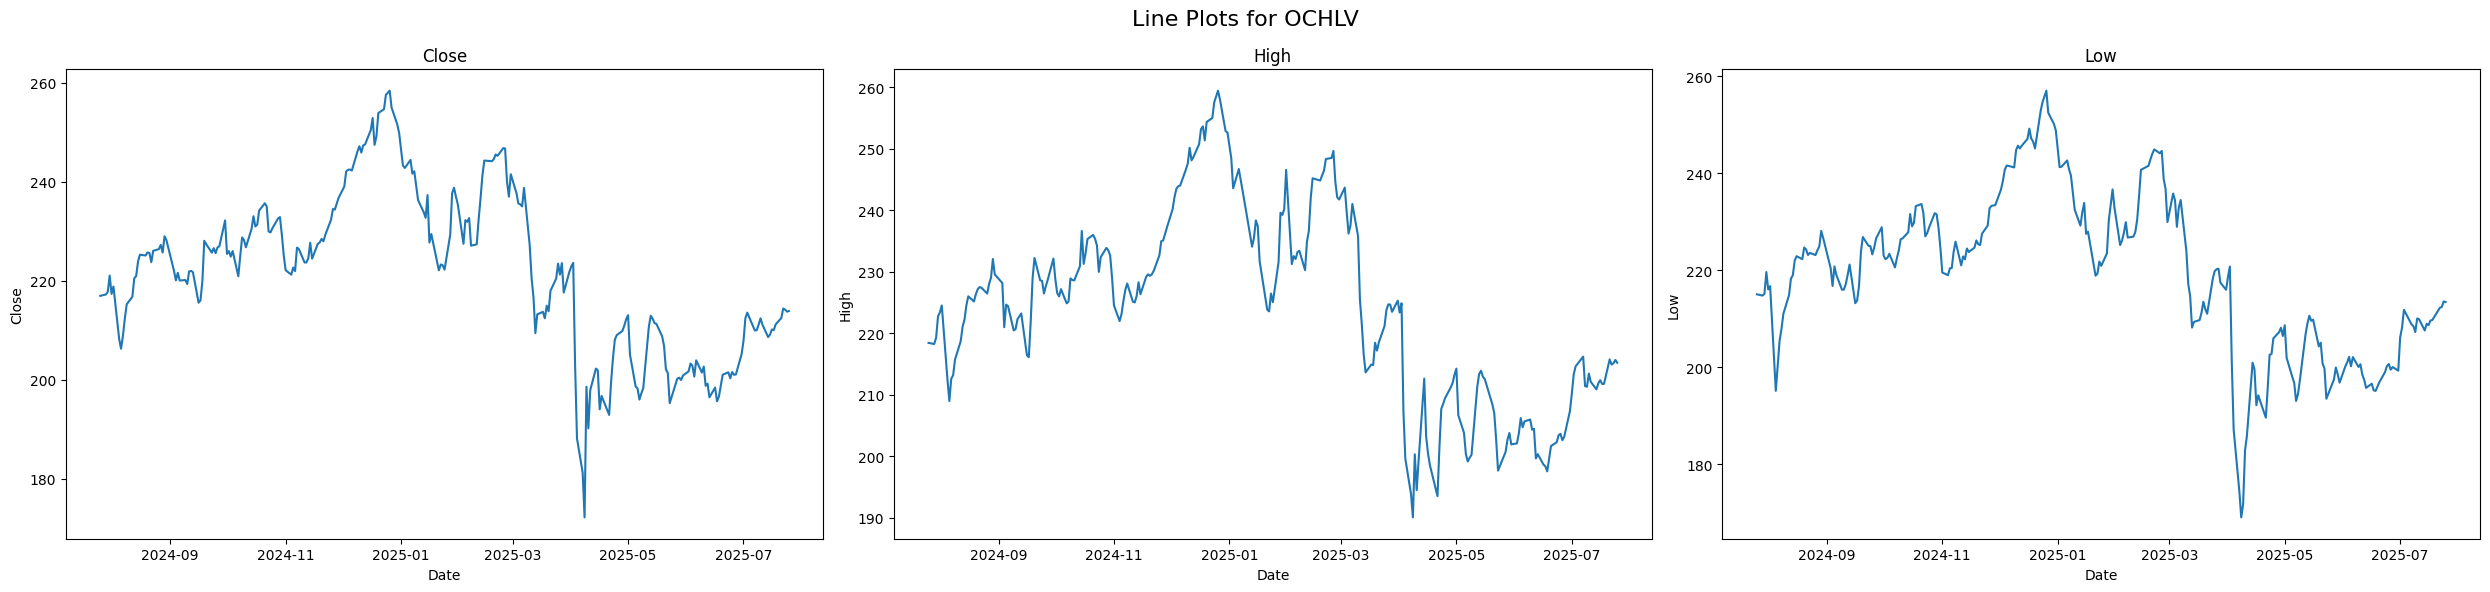

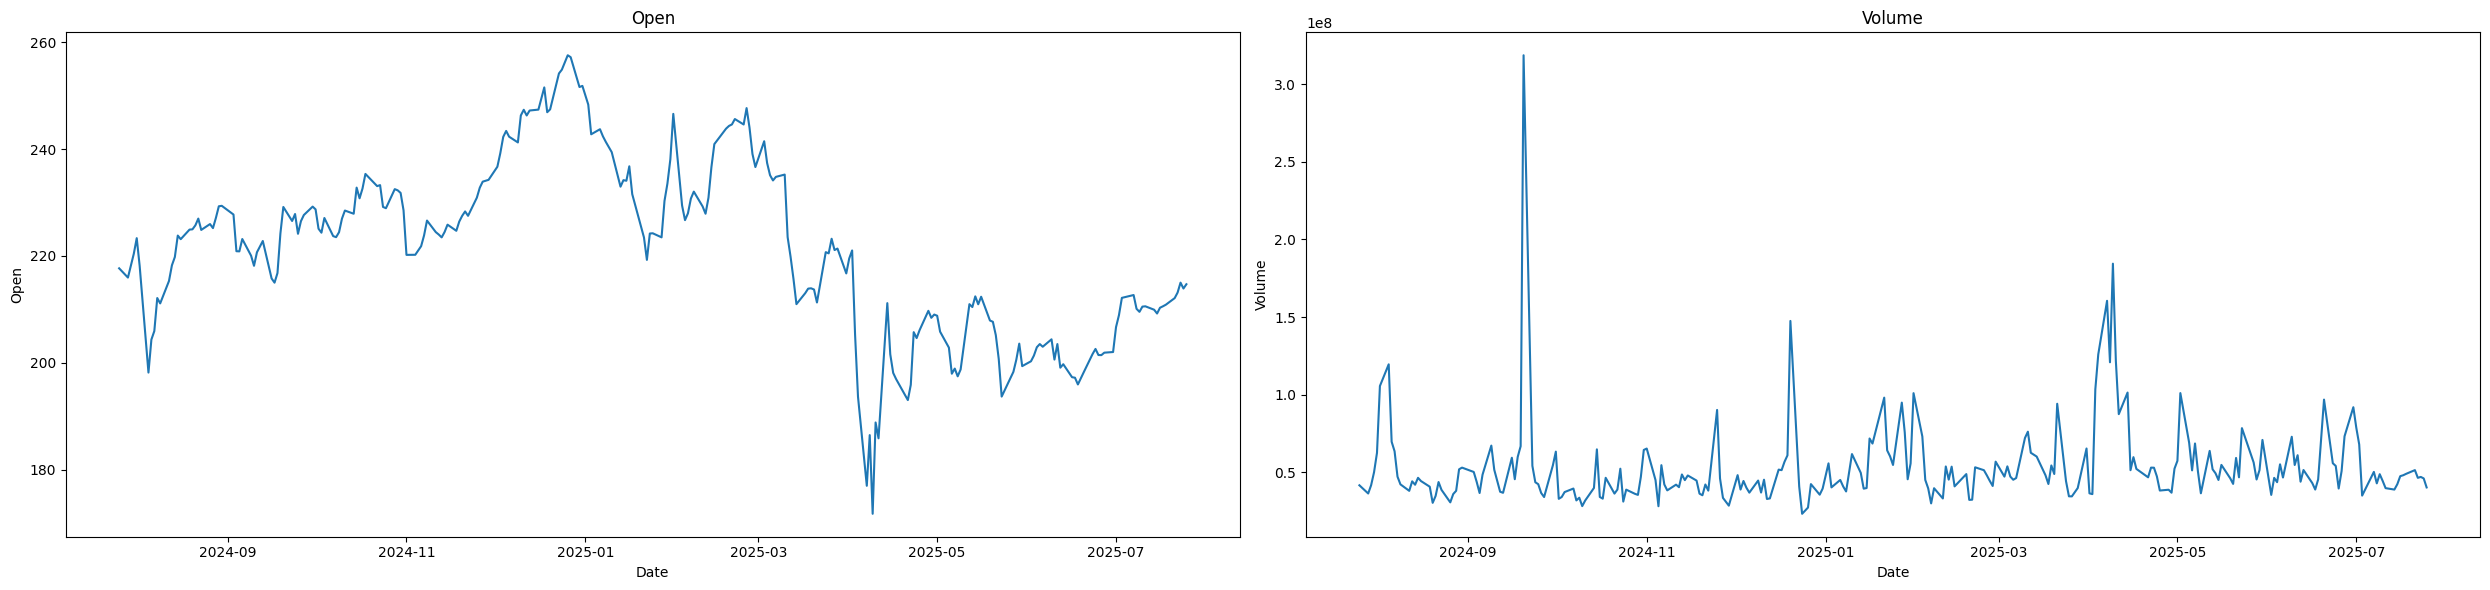

In [11]:
fig, axes = plt.subplots(1,3,figsize=(25,6)) # setup 3 plots in 1 row
sns.lineplot(data = df ,x=df.index, y= 'Close', ax = axes[0])
axes[0].set_title("Close")

sns.lineplot(data = df ,x=df.index, y= 'High', ax = axes[1])
axes[1].set_title("High")

sns.lineplot(data = df ,x=df.index, y= 'Low', ax = axes[2])
axes[2].set_title("Low")

plt.suptitle("Line Plots for OCHLV", fontsize=16)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2,figsize=(25,6)) # setup 3 plots in 1 row
sns.lineplot(data = df ,x=df.index, y= 'Open', ax = axes[0])
axes[0].set_title("Open")

sns.lineplot(data = df ,x=df.index, y= 'Volume', ax = axes[1])
axes[1].set_title("Volume")

plt.tight_layout()
plt.show()

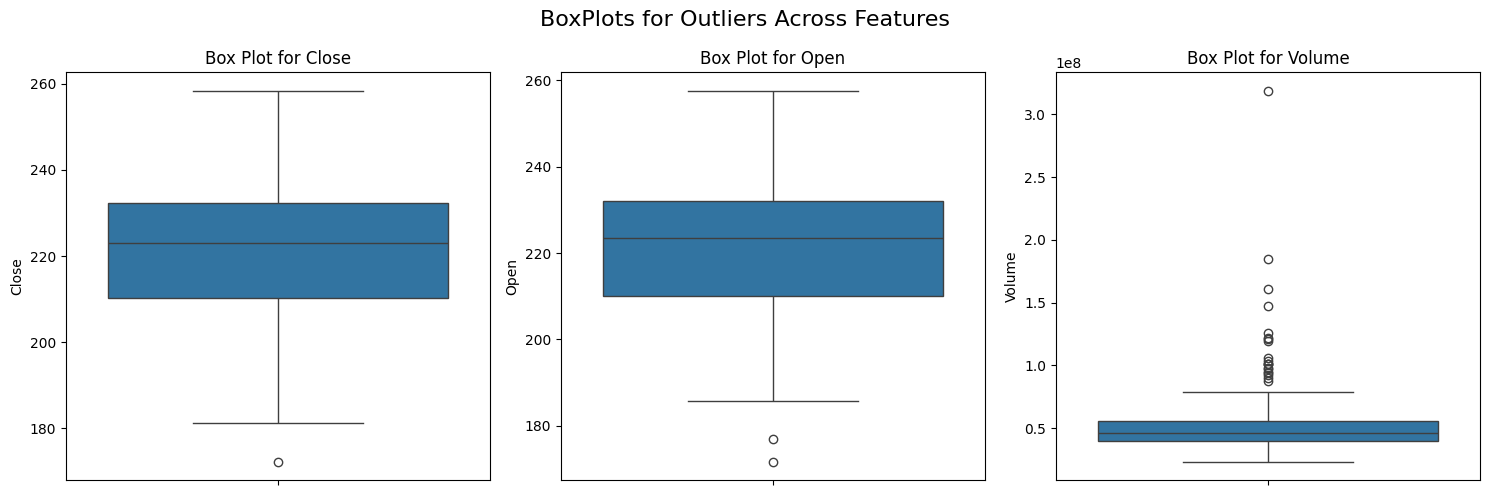

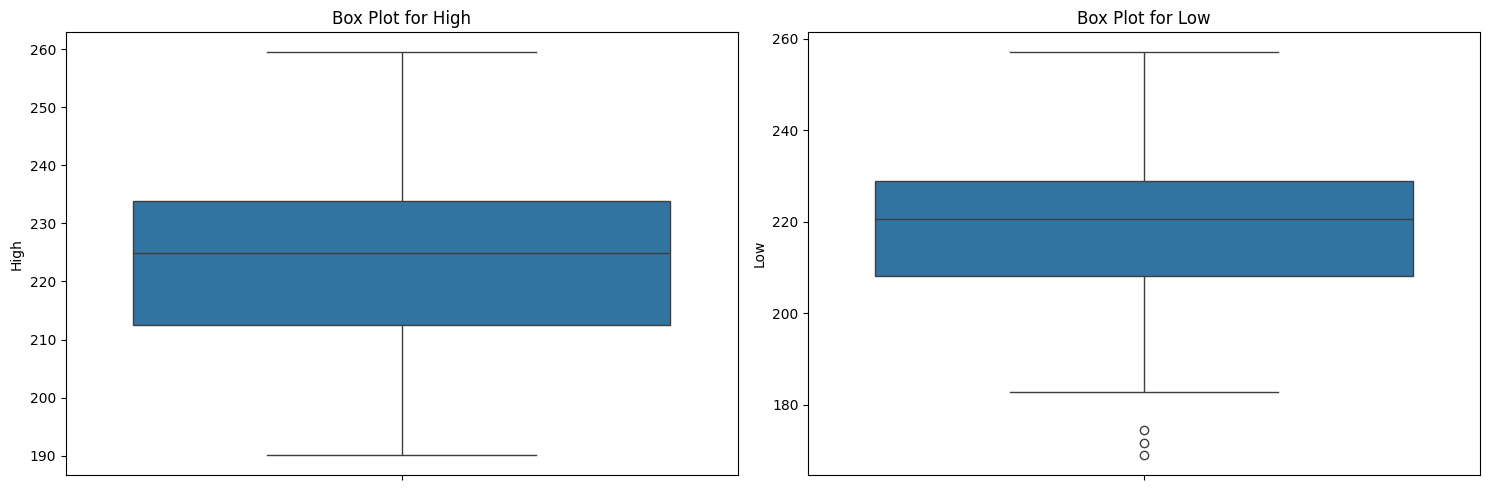

In [12]:
fig, axes = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(data = df['Close'], ax=axes[0])
axes[0].set_title("Box Plot for Close")

sns.boxplot(data = df['Open'], ax=axes[1])
axes[1].set_title("Box Plot for Open")

sns.boxplot(data = df['Volume'], ax=axes[2])
axes[2].set_title("Box Plot for Volume")

plt.suptitle("BoxPlots for Outliers Across Features", fontsize=16)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2, figsize = (15,5))

sns.boxplot(data = df['High'], ax=axes[0])
axes[0].set_title("Box Plot for High")

sns.boxplot(data = df['Low'], ax=axes[1])
axes[1].set_title("Box Plot for Low")

plt.tight_layout()
plt.show()

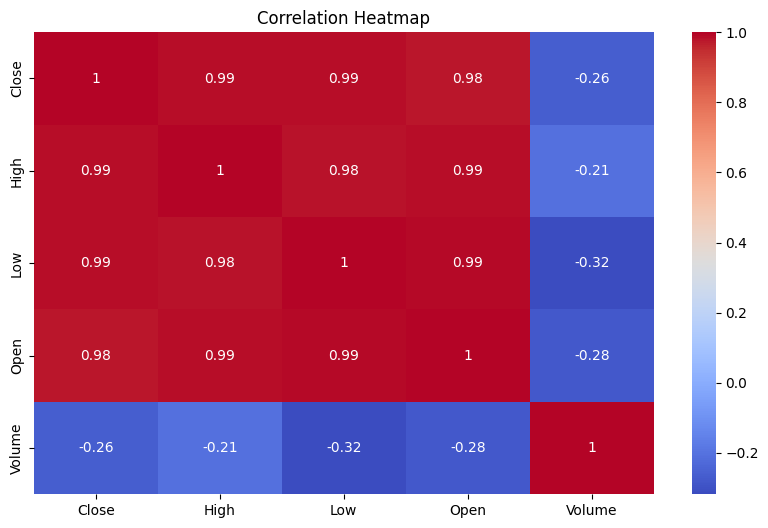

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Summary:

        We explored three types of plots — line plots, box plots, and a heatmap, each serving a distinct purpose:

        1. Line plots helped visualize the trend of each feature over time.

        2. Box plots revealed the presence of outliers, especially in Volume.

        3. The heatmap displayed correlations, showing that Open, Close, High, and
        Low are strongly correlated, while Volume is relatively independent.



          While outlier removal is common in many datasets, it’s not recommended in this case.
          The decision depends on the nature of the data and the type of model being used.

          Since this is financial time-series data, and outliers often reflect real market events or
          valuable signals (especially in Volume), we choose to keep them  


## Feature Engineering
    

    After visulaizing we have one thing clear, we dont have column which is a
    clear target like in Iris datset (species) so we create our own target using our buisness
    objective, which is Predict tomorrow’s closing price using today’s and past data.


### Shifting
        here we create a target column by shifting the dataset one stepbackwards.
        

In [15]:
df['Target'] = df['Close'].shift(-1)
df.tail()

,Close,High,Low,Open,Volume,Target
Date,,,,,,
2025-07-21,212.479996,215.779999,211.630005,212.100006,51377400,214.399994
2025-07-22,214.399994,214.949997,212.229996,213.139999,46404100,214.149994
2025-07-23,214.149994,215.149994,212.410004,215.000000,46989300,213.759995
2025-07-24,213.759995,215.690002,213.529999,213.899994,46022600,213.880005
2025-07-25,213.880005,215.240005,213.399994,214.699997,40219700,NaN


### Creating a Lag Feature
          We Captures temporal dependencies here, this is bcz models can remebe r history on thier own.

In [17]:
df['lag'] = df['Close'].shift(1)

,Close,High,Low,Open,Volume,Target,lag
Date,,,,,,,
2024-07-26,216.945419,218.468296,215.004484,217.681965,41601300,217.224121,NaN
2024-07-29,217.224121,218.279184,214.745706,215.950081,36311800,217.781525,216.945419
2024-07-30,217.781525,219.304402,215.113992,218.169709,41643800,221.046219,217.224121
2024-07-31,221.046219,222.778125,219.602972,220.409199,50036300,217.343552,217.781525
2024-08-01,217.343552,223.435059,216.009793,223.325570,62501000,218.836578,221.046219


### Handling NaN's
        after are recent two steps there are two nana sand we have top deal with them so we drop both rows entierly
        we do so that our model doesnt train on empty values
        

In [21]:
df.dropna(inplace=True)
print(df.head(2))
print("\n\n")
print(df.tail(2))

                 Close        High         Low        Open    Volume  \
Date                                                                   
2024-07-29  217.224121  218.279184  214.745706  215.950081  36311800   
2024-07-30  217.781525  219.304402  215.113992  218.169709  41643800   

                Target         lag  
Date                                
2024-07-29  217.781525  216.945419  
2024-07-30  221.046219  217.224121  



                 Close        High         Low        Open    Volume  \
Date                                                                   
2025-07-23  214.149994  215.149994  212.410004  215.000000  46989300   
2025-07-24  213.759995  215.690002  213.529999  213.899994  46022600   

                Target         lag  
Date                                
2025-07-23  213.759995  214.399994  
2025-07-24  213.880005  214.149994  


### Spliting the dataset
        the last step here is to seprate the target from rest of the data set.
        then we specify on which part of data to train on and what to test.

In [22]:
X = df.drop('Target', axis=1)
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  #  Important for time series!
)

## Training the model

### Use the random forest object to fit the data on the model

In [23]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

### use test part of data to perdicict and evaluate

In [24]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 12.684413025607048
R² Score: 0.6191027656511365


## Visualize The Predictions

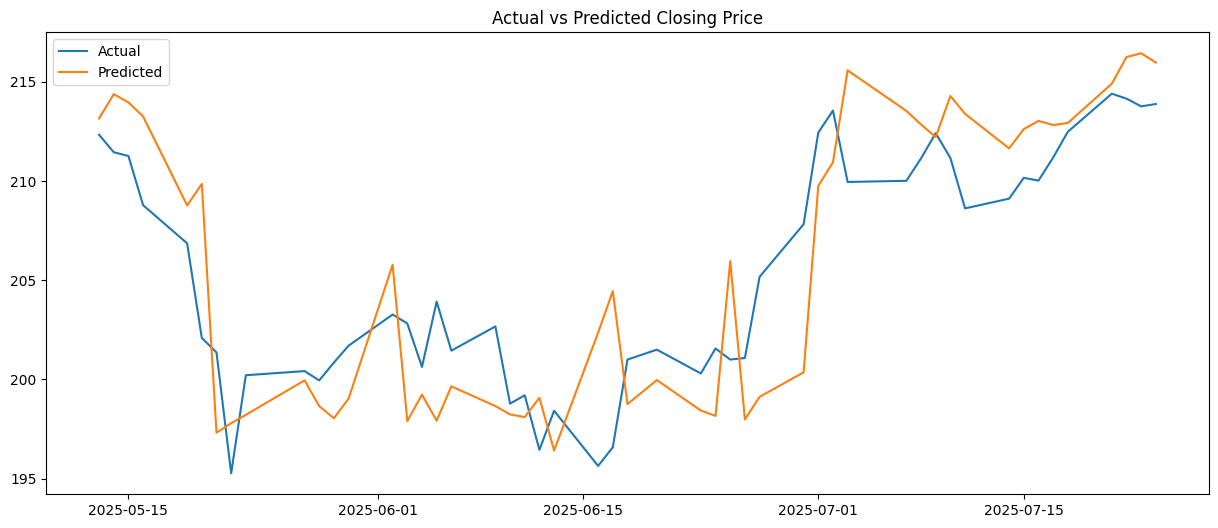

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Closing Price")
plt.show()

### Summary

        In this project, we built a stock price prediction model using Apple's (AAPL) historical data from yfinance.
        After exploring the data with line plots, box plots, and a correlation heatmap, we observed strong
        correlations among Open, Close, High, and Low prices, with Volume being less correlated and containing
        outliers—which we chose not to remove due to the nature of financial data. We engineered features by
        creating a Target column (next day’s closing price) and a Close_lag1 column (previous day’s close),
        then dropped rows with missing values caused by shifting. We used a Random Forest Regressor,
        split the data without shuffling (to preserve time order), and evaluated the model using metrics
        like MSE and R², finding that even with basic features, Random Forest gave reasonably accurate predictions,
        showing the importance of thoughtful preprocessing and feature engineering in time-series forecasting.











